### Import Libraries

In [1]:
import numpy as np
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Load and Observe Dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ";")
print(f'Dataset Shape: {df.shape}')

Dataset Shape: (70000, 13)


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


### Data Transformation

In [6]:
# age is given in days
# transforming it into years would easier for our understanding
df['age'] = df['age'] / 365

### Data Preprocessing

In [7]:
# rename some of the column names to proper naming conventions
df.rename(columns = {'ap_hi':'systolic','ap_lo':'diastolic','gluc':'glucose','alco':'alcohol_intake','active':'physical_activity','cardio':'target'}, inplace = True)

In [5]:
# rename the columns
df['cholesterol'].replace({1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}, inplace = True)
df['glucose'].replace({1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}, inplace = True)

In [6]:
# check for any missing values 
df.isna().sum()

id                   0
age                  0
gender               0
height               0
weight               0
systolic             0
diastolic            0
cholesterol          0
glucose              0
smoke                0
alcohol_intake       0
physical_activity    0
target               0
dtype: int64

In [8]:
df.drop(['id'], axis = 1, inplace = True)

In [9]:
# check for any duplicated values
df.duplicated().sum()

24

In [10]:
# drop duplicated values
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(69976, 12)

In [12]:
# From above, it can be seen that there are no missing values and 24 duplicate records have been removed

### Exploratory Data Analysis

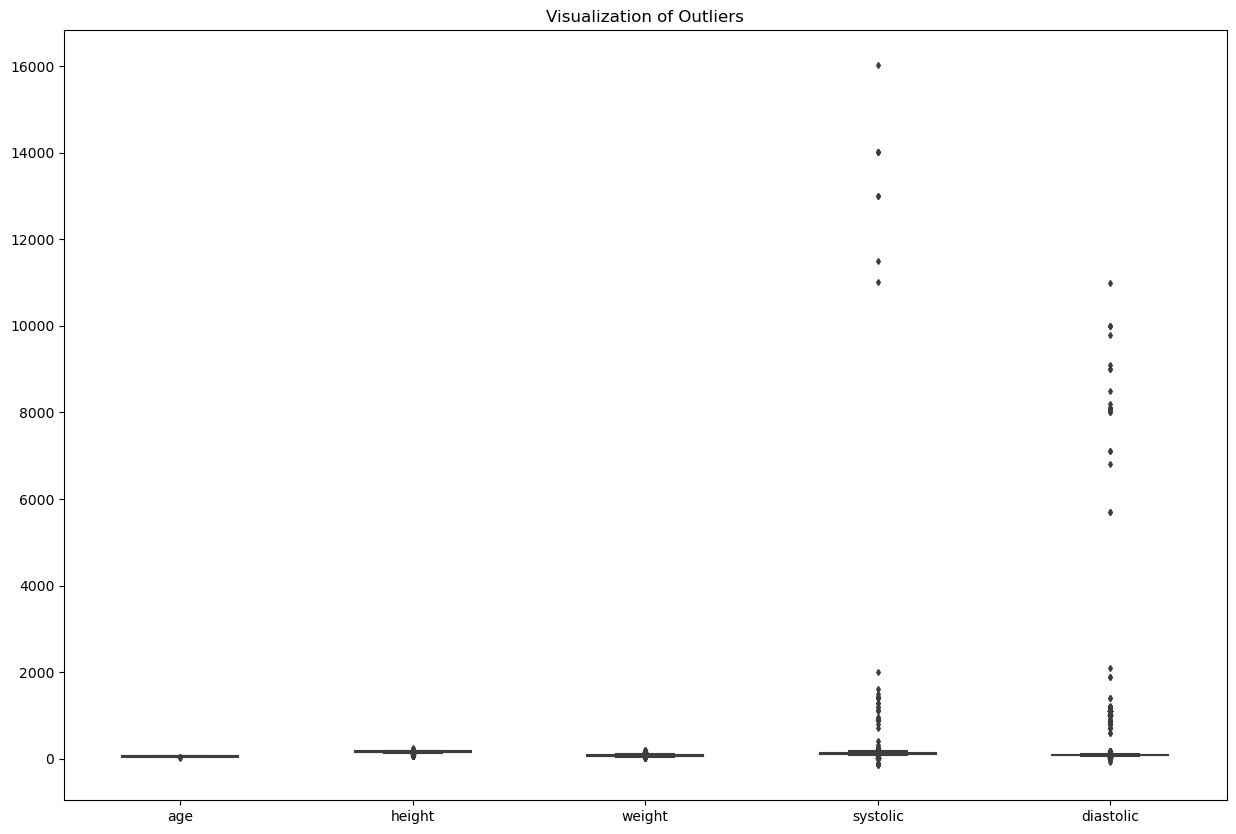

age False
height True
weight True
systolic True
diastolic True


In [13]:
# check for any outliers for numeric variables
def outlier_thresholds(df, col_name, q1 = 0.10, q3 = 0.90):
    Q1 = df[col_name].quantile(q1)
    Q3 = df[col_name].quantile(q3)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit

def check_outlier(df, col_name, q1 = 0.10, q3 = 0.90):
    low_limit, up_limit = outlier_thresholds(df, col_name, q1, q3)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis = None):
        return True
    else:
        return False

# checking outliers using boxplots
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df[['age', 'height', 'weight', 'systolic', 'diastolic']], width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of Outliers")
plt.show()

for col in df[['age', 'height', 'weight', 'systolic', 'diastolic']]:
    print(col, check_outlier(df, col))

In [14]:
# replace outliers with upper and lower limit
def replace_with_thresholds(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    df.loc[(df[col_name] < low_limit), col_name] = low_limit
    df.loc[(df[col_name] > up_limit), col_name] = up_limit

for col in df[['age', 'height', 'weight', 'systolic', 'diastolic']]:
    replace_with_thresholds(df, col)

for col in df[['age', 'height', 'weight', 'systolic', 'diastolic']]:
    print(col, check_outlier(df, col))

age False
height False
weight False
systolic False
diastolic False


In [35]:
### Feature Engineering

In [15]:
# adding a new column 'BMI' to the dataframe
df['BMI'] = (df['weight'] / (df['height'] ** 2) * 10000)
df['BMI'] = df['BMI'].round(decimals = 1)

In [37]:
df.describe().round(2)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol_intake,physical_activity,target,BMI
count,69976.00,69976.00,69976.00,69976.00,69976.00,69976.00,69976.00,69976.00,69976.00,69976.00,69976.0,69976.0,69976.0
mean,53.34,1.35,164.39,74.19,126.84,81.84,1.37,1.23,0.09,0.05,0.8,0.5,27.5
std,6.76,0.48,7.98,14.29,17.61,10.51,0.68,0.57,0.28,0.23,0.4,0.5,5.3
min,29.58,1.00,125.00,10.00,50.00,40.00,1.00,1.00,0.00,0.00,0.0,0.0,3.5
25%,48.39,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.9
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.4
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.2
max,64.97,2.00,205.00,145.50,210.00,120.00,3.00,3.00,1.00,1.00,1.0,1.0,93.1


In [38]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol_intake,physical_activity,target,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [16]:
df['gender'] = np.where(df['gender'] == 2, 1, 0)
df['cholesterol'] = df['cholesterol'].map({1: 0, 2: 1, 3: 2})
df['glucose'] = df['glucose'].map({1: 0, 2: 1, 3: 2})

In [40]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol_intake,physical_activity,target,BMI
0,50.391781,1,168,62.0,110,80,0,0,0,0,1,0,22.0
1,55.419178,0,156,85.0,140,90,2,0,0,0,1,1,34.9
2,51.663014,0,165,64.0,130,70,2,0,0,0,0,1,23.5
3,48.282192,1,169,82.0,150,100,0,0,0,0,1,1,28.7
4,47.873973,0,156,56.0,100,60,0,0,0,0,0,0,23.0


### Class Distribution

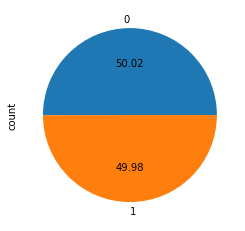

In [18]:
df['target'].value_counts().plot(kind = "pie", autopct = "%.2f")
plt.show()

In [ ]:
# as displayed above, the target variable is quite balanced, which will be easier to compare the groups and identify differences between them

/var/folders/d9/gy217l6d6rdc_rrk4q6qtc880000gn/T/ipykernel_71267/3441042663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'][df['target'] == 0], ax = a, color = 'green')
/var/folders/d9/gy217l6d6rdc_rrk4q6qtc880000gn/T/ipykernel_71267/3441042663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



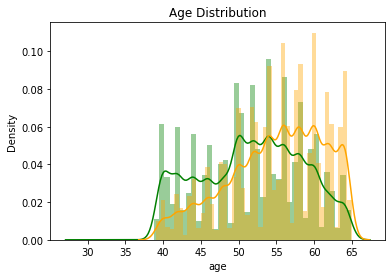

In [75]:
fig, a = plt.subplots(1,1)
sns.distplot(df['age'][df['target'] == 0], ax = a, color = 'green')
sns.distplot(df['age'][df['target'] == 1 ], ax = a, color = 'orange')
a.set_title('Age Distribution')
plt.show()

In [31]:
# people above the age of 54 are more prone to have heart disease
# as people get older, the risk of developing heart disease increases

/Users/damiafatihah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/damiafatihah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


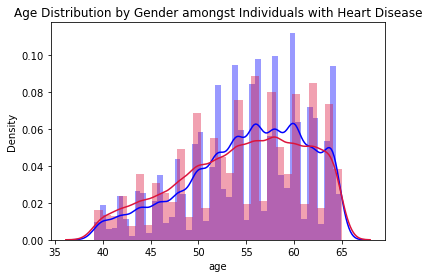

In [32]:
fig, a = plt.subplots(1,1)
sns.distplot(df['age'][(df['gender'] == 1) & (df['target'] == 1)], ax = a, color = 'blue')
sns.distplot(df['age'][(df['gender'] == 2) & (df['target'] == 1)], ax = a, color = 'crimson')
a.set_title('Age Distribution by Gender amongst Individuals with Heart Disease')
plt.show()

In [33]:
# males below the age of 50 have higher tendency to have heart disease compared to female but there is not much difference

Text(0.5, 1.0, 'BMI State Distribution')

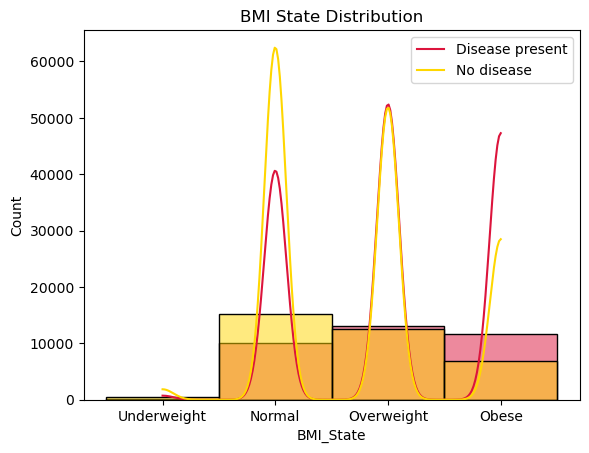

In [19]:
# categorise normal & abnormal
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_State"] = df["BMI"].apply(lambda x: bmi_category(x))
df['BMI_State'] = pd.Categorical(df['BMI_State'], categories = ['Underweight', 'Normal', 'Overweight', 'Obese'])

sns.histplot(x = 'BMI_State', hue = 'target', data = df, palette = ['gold', 'crimson'], kde = True)
plt.legend(['Disease present', 'No disease'])
plt.title('BMI State Distribution')

In [ ]:
# people with bmi less than 18.5 or more than 25 are more likely to have heart disease

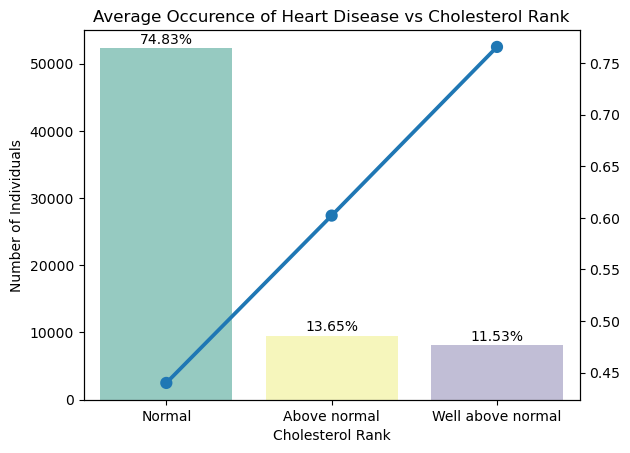

In [16]:
# calculate the proportion of individuals with heart disease in each category of cholesterol rank
tmp = df.groupby('cholesterol')['target'].mean()

# create a bar chart to show the number of individuals in each category of cholesterol rank
ax = sns.countplot(x = 'cholesterol', data = df, order = ['Normal', 'Above normal', 'Well above normal'], palette = 'Set3')

# add a line chart to show the proportion of individuals with heart disease in each category of cholesterol rank
sns.pointplot(x = tmp.index, y = tmp.values, order = ['Normal', 'Above normal', 'Well above normal'], ax = ax.twinx())

# add text labels to show the percentage of individuals in each category of cholesterol rank
for i in ax.patches:
    height = i.get_height()
    ax.annotate('{:.2f}%'.format(height / len(df['cholesterol']) * 100), xy = (i.get_x() + i.get_width() / 2, height),
                xytext = (0, 1), textcoords = 'offset points', ha = 'center', va = 'bottom')
    
# add chart titles and labels
ax.set_title('Average Occurence of Heart Disease vs Cholesterol Rank')
ax.set_xlabel('Cholesterol Rank')
ax.set_ylabel('Number of Individuals')

plt.show()

In [37]:
# it can be said that the chances of having heart disease increases as the cholesterol rank increases

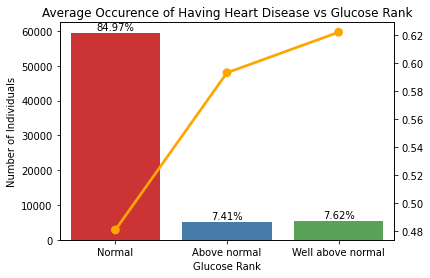

In [95]:
# calculate the proportion of individuals with cardiovascular disease in each category of glucose rank
tmp = df.groupby('glucose')['target'].mean()

# create a bar chart to show the number of individuals in each category of glucose rank
ax = sns.countplot(x = 'glucose', data = df, order = ['Normal', 'Above normal', 'Well above normal'], palette = 'Set1')

# add a line chart to show the proportion of individuals with cardiovascular disease in each category of glucose rank
sns.pointplot(x = tmp.index, y = tmp.values, order = ['Normal', 'Above normal', 'Well above normal'], ax = ax.twinx(), color = 'orange')

# add text labels to show the percentage of individuals in each category of glucose rank
for i in ax.patches:
    height = i.get_height()
    ax.annotate('{:.2f}%'.format(height / len(df['glucose']) * 100), xy = (i.get_x() + i.get_width() / 2, height),
                xytext = (0, 1), textcoords = 'offset points', ha = 'center', va = 'bottom')

# add chart titles and labels
ax.set_title('Average Occurence of Having Heart Disease vs Glucose Rank')
ax.set_xlabel('Glucose Rank')
ax.set_ylabel('Number of Individuals')

plt.show()

In [39]:
# it can be said the likelihood of having heart disease increase as the glucose rank increases

In [23]:
#function to categorise blood pressure
def bp_categories(df):
    if df['systolic'] > 180 or df['diastolic'] > 120:
        return 'Hypertensive Crisis'
    elif (140 <= df['systolic'] <= 180) or (90 <= df['diastolic'] <= 120):
        return 'High Blood Pressure (Stage 2)'
    elif (130 <= df['systolic'] < 140) or (80 <= df['diastolic'] < 90) :
        return 'High Blood Pressure (Stage 1)'
    elif (120 <= df['systolic'] < 130) and df['diastolic'] < 80:
        return 'Elevated'
    else:
        return 'Normal'

In [24]:
df['BP_category'] = df.apply(bp_categories, axis = 1)

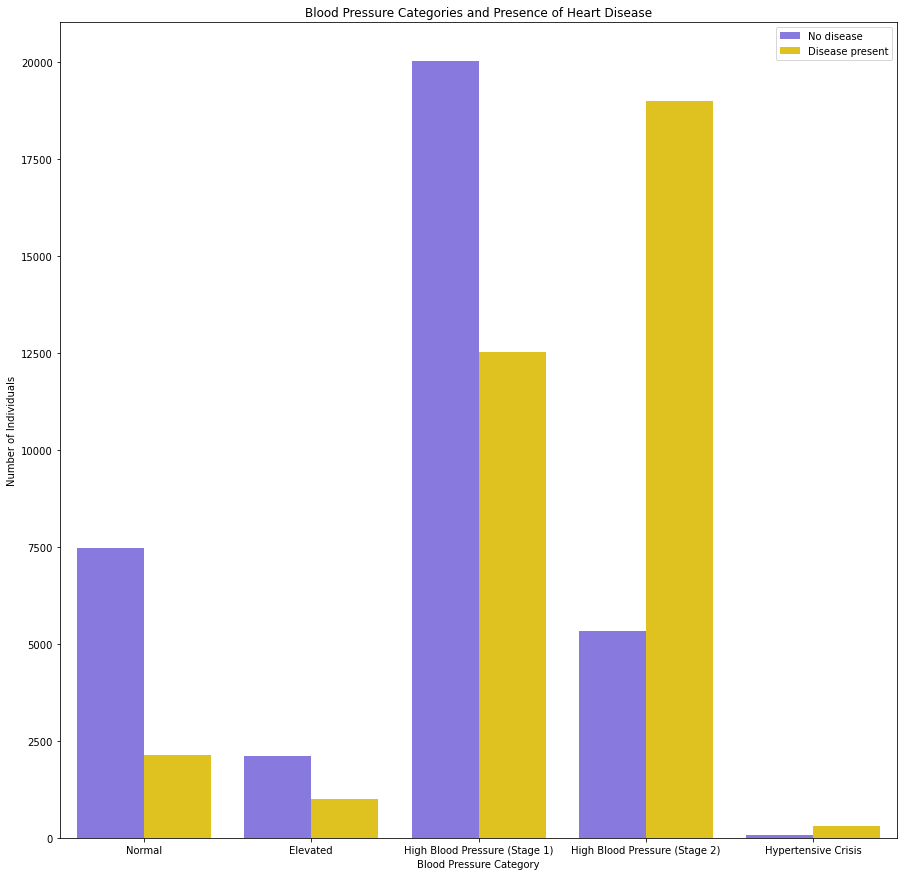

In [42]:
plt.figure(figsize = (15,15))
sns.countplot(x = 'BP_category', hue = 'target', data = df, order = ["Normal", "Elevated", "High Blood Pressure (Stage 1)", "High Blood Pressure (Stage 2)", "Hypertensive Crisis"], palette = ['#7B68EE', '#FFD700'])
plt.title('Blood Pressure Categories and Presence of Heart Disease')
plt.xlabel('Blood Pressure Category')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Number of Individuals')
plt.show()

In [43]:
# Groups that have a higher prevalence of heart disease have blood pressure that could be classified as High Blood Pressure (Stage 2) or Hypertensive Crisis.

# Normal, Elevated, and High Blood Pressure (Stage 1) have a higher prevalence of patients without heart disease, though it is still present.

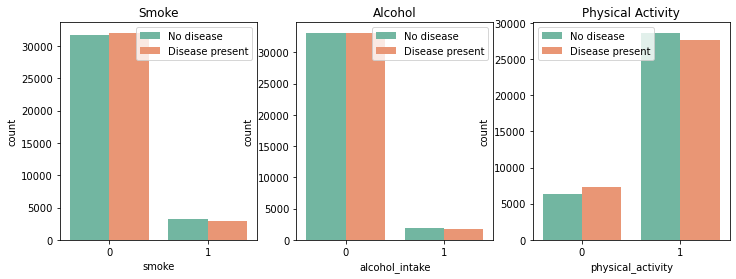

In [64]:
# Create a 1x3 grid of subplots
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

# Plot countplot for smoke in the first subplot
sns.countplot(x = 'smoke', data = df, hue = 'target', palette = 'Set2', ax = ax[0])
ax[0].legend(['No disease', 'Disease present'])
ax[0].set_title('Smoke')

# Plot countplot for alcohol in the third subplot
sns.countplot(x = 'alcohol_intake', data = df, hue = 'target', palette = 'Set2', ax = ax[1])
ax[1].legend(['No disease', 'Disease present'])
ax[1].set_title('Alcohol')

# Plot countplot for physical activity in the second subplot
sns.countplot(x = 'physical_activity', data = df, hue = 'target', palette = 'Set2', ax = ax[2])
ax[2].legend(['No disease', 'Disease present'])
ax[2].set_title('Physical Activity')

# Display the figure
plt.show()

Shapiro-Wilk Test
test statistic: 0.9661
p-value: 0.0


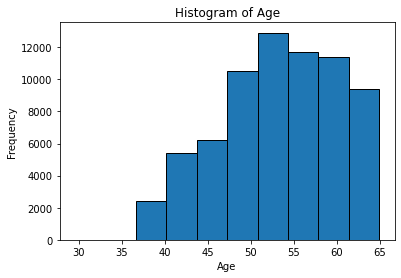

In [26]:
import scipy.stats as stats

# perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(df["age"])

# print result
print("Shapiro-Wilk Test")
print(f"test statistic: {statistic:.4f}")
print(f"p-value: {p_value:}")
    
# plot histogram
plt.hist(df['age'], bins=10, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [28]:
from scipy.stats import mannwhitneyu

age_with_disease = df[df['target'] == 1]['age']
age_without_disease = df[df['target'] == 0]['age']

# perform the Mann-Whitney U test
print(mannwhitneyu(age_with_disease, age_without_disease))

MannwhitneyuResult(statistic=777787070.0, pvalue=0.0)


In [57]:
tmp = df[['gender', 'smoke', 'alcohol_intake', 'physical_activity','cholesterol', 'glucose', 'target']]

for i in tmp.columns:
    df[i] = df[i].astype('category')
    
print(df.dtypes)

age                   float64
gender               category
height                  int64
weight                float64
systolic                int64
diastolic               int64
cholesterol          category
glucose              category
smoke                category
alcohol_intake       category
physical_activity    category
target               category
BMI                   float64
dtype: object


In [35]:
chi2_results = pd.DataFrame(columns = ['test statitistic', 'p-value', 'df'])

In [36]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.BMI_State, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['BMI_State'] = [chi2, p, dof]

chi2 =  2388.4209193433835
p-val =  0.0
degree of freedom =  8


In [37]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.BP_category, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['BP_Category'] = [chi2, p, dof]

chi2 =  12937.228398700361
p-val =  0.0
degree of freedom =  10


In [38]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.smoke, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Smoke'] = [chi2, p, dof]

chi2 =  16.88386852296511
p-val =  0.0020359893691763984
degree of freedom =  4


In [39]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.alcohol_intake, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Alcohol'] = [chi2, p, dof]

chi2 =  3.7963251220795993
p-val =  0.43427138706253887
degree of freedom =  4


In [40]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.physical_activity, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Physical Activity'] = [chi2, p, dof]

chi2 =  89.01456625157039
p-val =  2.1321288271136104e-18
degree of freedom =  4


In [41]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.gender, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Gender'] = [chi2, p, dof]

chi2 =  4.520144341712786
p-val =  0.3401655604386513
degree of freedom =  4


In [42]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.cholesterol, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Cholesterol'] = [chi2, p, dof]

chi2 =  3421.3985623501467
p-val =  0.0
degree of freedom =  6


In [43]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.glucose, df.target, margins = True))
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi2_results.loc['Glucose'] = [chi2, p, dof]

chi2 =  586.1834296866391
p-val =  2.2275433116581686e-123
degree of freedom =  6


In [44]:
chi2_results

,test statitistic,p-value,df
BMI_State,2388.420919,0.000000e+00,8.0
BP_Category,12937.228399,0.000000e+00,10.0
Smoke,16.883869,2.035989e-03,4.0
Alcohol,3.796325,4.342714e-01,4.0
Physical Activity,89.014566,2.132129e-18,4.0
Gender,4.520144,3.401656e-01,4.0
Cholesterol,3421.398562,0.000000e+00,6.0
Glucose,586.183430,2.227543e-123,6.0


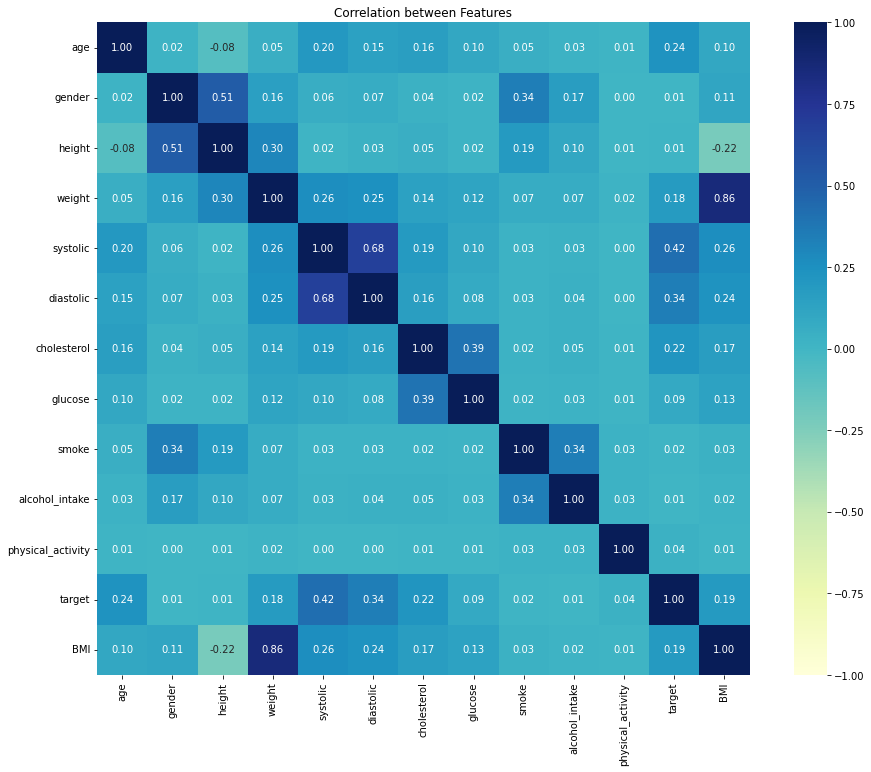

{'corr':                         age    gender    height    weight  systolic   
age                1.000000  0.022763 -0.084578  0.054577  0.199658  \
gender             0.022763  1.000000  0.513194  0.156162  0.059586   
height            -0.084578  0.513194  1.000000  0.302807  0.015191   
weight             0.054577  0.156162  0.302807  1.000000  0.263605   
systolic           0.199658  0.059586  0.015191  0.263605  1.000000   
diastolic          0.146715  0.066595  0.032198  0.248411  0.676594   
cholesterol        0.159017  0.035719  0.053198  0.143464  0.193168   
glucose            0.099704  0.020153  0.020991  0.122527  0.099956   
smoke              0.047650  0.338060  0.193192  0.068180  0.027726   
alcohol_intake     0.029735  0.170843  0.096836  0.067275  0.032072   
physical_activity  0.009918  0.004503  0.007590  0.017250  0.002624   
target             0.238189  0.007059  0.011779  0.182562  0.415733   
BMI                0.100376  0.110433 -0.218858  0.856658  0.259420 

In [18]:
from dython.nominal import associations
# specify the categorical and continuous variables
cat_vars = ['gender', 'smoke', 'alcohol_intake', 'physical_activity','cholesterol', 'glucose', 'target']
num_vars = ['age', 'height', 'weight', 'systolic', 'diastolic', 'BMI']

# compute associations between all variables
assoc_report = associations(df, nominal_columns = cat_vars, numerical_columns = num_vars, annot = True, title = "Correlation between Features", cmap = "YlGnBu", figsize = (16, 12))

# display the association report
print(assoc_report)

### Classification Models

In [ ]:
# Logistic Regression
# Support Vector Machines
# Naive Bayes
# Decision Trees
# Random Forest
# XGBoost
# KNN

In [41]:
# extract input and output features
y = df['target']
X = df.drop(columns = ['target', 'height', 'weight'])

In [42]:
X

,age,gender,systolic,diastolic,cholesterol,glucose,smoke,alcohol_intake,physical_activity,BMI
0,50.391781,1,110,80,0,0,0,0,1,22.0
1,55.419178,0,140,90,2,0,0,0,1,34.9
2,51.663014,0,130,70,2,0,0,0,0,23.5
3,48.282192,1,150,100,0,0,0,0,1,28.7
4,47.873973,0,100,60,0,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,1,120,80,0,0,1,0,1,26.9
69996,61.920548,0,140,90,1,1,0,0,1,50.5
69997,52.235616,1,180,90,2,0,0,1,0,31.4
69998,61.454795,0,135,80,0,1,0,0,0,27.1


In [43]:
# split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=420)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48983, 10) (48983,)
(20993, 10) (20993,)


In [44]:
# feature normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['age','systolic', 'diastolic', 'BMI']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder = 'passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct

X_train_scaled, X_test_scaled, ct = featureNormalisation()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, plot_confusion_matrix, plot_roc_curve

svm = SVC(C = 1, gamma = 0.1, kernel = 'rbf') # best parameter after tuning
lr = LogisticRegression()
gnb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()

In [46]:
models = {"Logistic Regression" : lr,
          "Naive Bayes" : gnb,
          "Decision Tree" : dt,
          "Random Forest" : rf,
          "KNN" : knn,
          "SVM" : svm,
          "XGBoost" : xgb}
scores = { }

In [47]:
for key, value in models.items():    
    model = value
    model.fit(X_train_scaled, y_train)
    scores[key] = model.score(X_test_scaled, y_test)

In [48]:
scores_frame = pd.DataFrame(scores, index = ["Accuracy"]).T
scores_frame.sort_values(by = ["Accuracy"], axis = 0 , ascending = False, inplace = True)
scores_frame

,Accuracy
SVM,0.735531
XGBoost,0.732959
Logistic Regression,0.729624
Naive Bayes,0.707474
Random Forest,0.705283
KNN,0.695470
Decision Tree,0.639975


In [49]:
results = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'])
confusionMatrix = pd.DataFrame(columns = ['True Positive', 'False Positive', 'True Negative', 'False Negative'])

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, plot_confusion_matrix, plot_roc_curve
def get_results(model, model_name):
    predictions = model.predict(X_test_scaled)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, predictions))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, cmap = "Blues", values_format = '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy, precision, recall, and F1 scores
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, predictions)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1, 2)]
    
    # save measurements into CM df
    confusionMatrix.loc[model_name] = [round(TP, 0), round(FP, 0), round(TN, 0), round(FN, 0)]

### Support Vector Machine

In [51]:
from sklearn.metrics import accuracy_score
# train model
svm.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = svm.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.7355308912494641


In [40]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10],'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time= 2.5min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time= 2.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time= 2.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.723 total time= 2.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time= 2.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time= 1.3min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.728 total time= 1.3min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time= 1.2min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time= 1.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time= 1.2min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.726 total time= 1.2min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10612
           1       0.76      0.69      0.72     10381

    accuracy                           0.74     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.74      0.73     20993



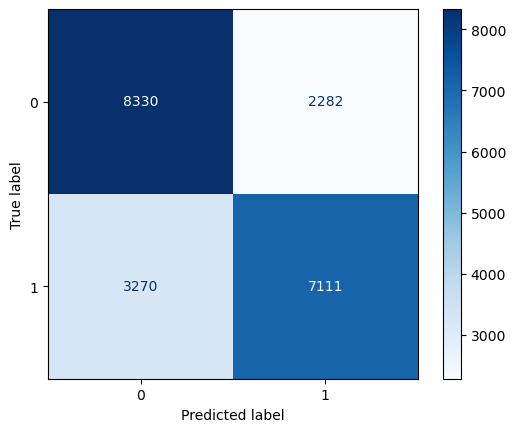

In [52]:
# see model results and add to results df
get_results(svm, 'Support Vector Machine')

In [53]:
svm_model = svm

In [54]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [55]:
joblib.dump(ct, 'svm_scaler.pkl')

['svm_scaler.pkl']

### Logistic Regression

In [56]:
# train model
lr.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = lr.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.7296241604344306


In [57]:
from sklearn.model_selection import GridSearchCV
# define parameter grid
param_grid = {
    'penalty': ['l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [42]
}

# create a GridSearchCV object to search over the parameter grid
grid = GridSearchCV(lr, param_grid, scoring = 'accuracy')

# fit the GridSearchCV object to the training data
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l2'], 'random_state': [42]},
             scoring='accuracy')

In [58]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'class_weight': None, 'penalty': 'l2', 'random_state': 42}
LogisticRegression(C=1, random_state=42)


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10612
           1       0.75      0.68      0.71     10381

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



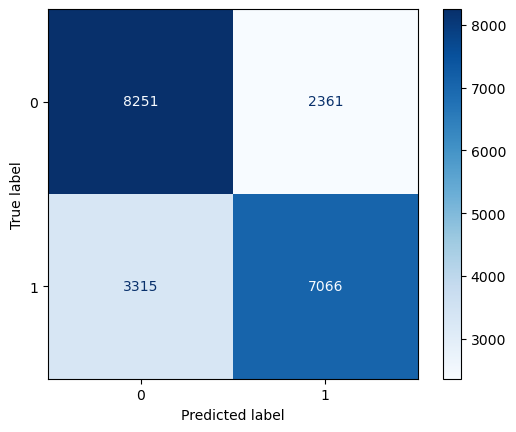

In [59]:
# see model results and add to results df
get_results(grid, 'Logistic Regression')

In [60]:
lr_model = grid

In [61]:
import joblib
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

In [62]:
joblib.dump(ct, 'lr_scaler.pkl')

['lr_scaler.pkl']

### Random Forest

In [63]:
# train model
rf.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = rf.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.70694993569285


In [64]:
from sklearn.model_selection import RandomizedSearchCV
# define parameter grid
param_grid = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# create a RandomizedSearchCV object to search over the parameter grid
randomized_search = RandomizedSearchCV(rf, param_grid, n_iter = 20, scoring = 'accuracy', random_state = 42)

# fit the RandomisedSearchCV object to the training data
randomized_search.fit(X_train_scaled, y_train)

/Users/damiafatihah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{1: 1.5}, {1: 1.7}],
                                        'max_depth': [100],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [200]},
                   random_state=42, scoring='accuracy')

In [65]:
# print best parameter after tuning
print(randomized_search.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(randomized_search.best_estimator_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 100, 'class_weight': {1: 1.5}}
RandomForestClassifier(class_weight={1: 1.5}, max_depth=100, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=200)


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10612
           1       0.71      0.76      0.73     10381

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.72     20993
weighted avg       0.73      0.73      0.72     20993



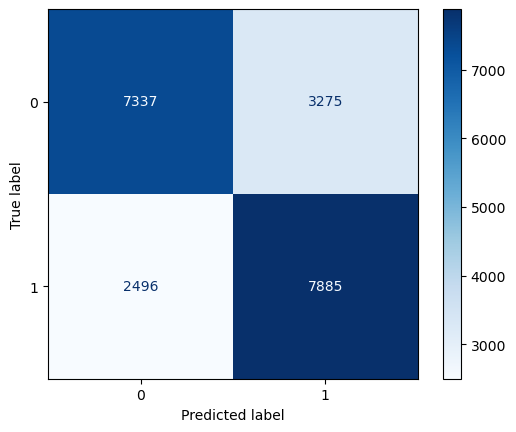

In [66]:
# see model results and add to results df
get_results(randomized_search, 'Random Forest')

In [67]:
rf_model = randomized_search

In [68]:
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [69]:
joblib.dump(ct, 'rf_scaler.pkl')

['rf_scaler.pkl']

### Decision Tree

In [70]:
# train model
dt.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = dt.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.6373553089124946


In [71]:
# define parameter grid
param_grid = {
    'max_depth' : [3, 4, 5], 
    'min_samples_split' : [0.01, 0.05, 0.1], 
    'min_samples_leaf' : [5, 7], 
    'class_weight' : [{1 : 1.4}, {1 : 1.6}]
}

# create a RandomizedSearchCV object to search over the parameter grid
randomized_search = RandomizedSearchCV(dt, param_grid, random_state = 42)

# fit the RandomisedSearchCV object to the training data
randomized_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [{1: 1.4}, {1: 1.6}],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [5, 7],
                                        'min_samples_split': [0.01, 0.05, 0.1]},
                   random_state=42)

In [72]:
# print best parameter after tuning
print(randomized_search.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(randomized_search.best_estimator_)

{'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_depth': 4, 'class_weight': {1: 1.6}}
DecisionTreeClassifier(class_weight={1: 1.6}, max_depth=4, min_samples_leaf=5,
                       min_samples_split=0.1)


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     10612
           1       0.72      0.73      0.73     10381

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



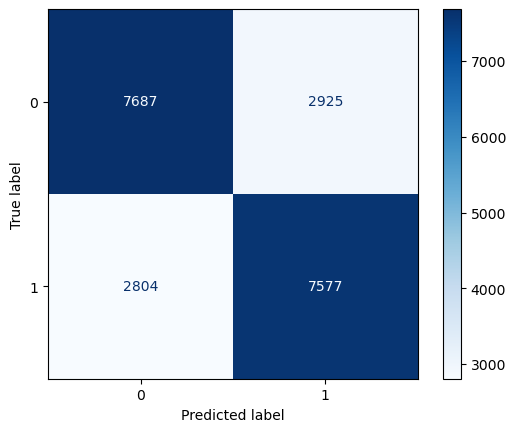

In [73]:
# see model results and add to results df
get_results(randomized_search, 'Decision Tree')

In [74]:
dt_model = randomized_search

In [75]:
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

In [76]:
joblib.dump(ct, 'dt_scaler.pkl')

['dt_scaler.pkl']

### Naive Bayes

In [77]:
# train model
gnb.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = gnb.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.7074739198780546


Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10612
           1       0.76      0.60      0.67     10381

    accuracy                           0.71     20993
   macro avg       0.72      0.71      0.70     20993
weighted avg       0.72      0.71      0.70     20993



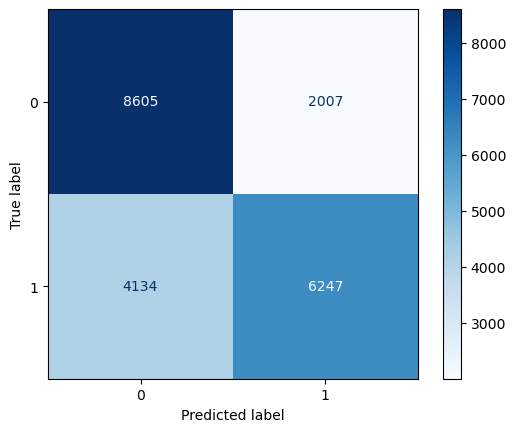

In [78]:
# see model results and add to results df
get_results(gnb, 'Naive Bayes')

In [79]:
gnb_model = gnb

In [80]:
joblib.dump(gnb_model, 'gnb_model.pkl')

['gnb_model.pkl']

In [81]:
joblib.dump(ct, 'gnb_scaler.pkl')

['gnb_scaler.pkl']

### K-Nearest Neighbours

In [82]:
# train model
knn.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = knn.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.6954699185442766


In [83]:
# define parameter grid
param_grid = {
    'n_neighbors' : [23, 25, 27], 
    'weights' : ['uniform', 'distance']
}

# create a GridSearchCV object to search over the parameter grid
grid = GridSearchCV(knn, param_grid)

# fit the GridSearchCV object to the training data
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [23, 25, 27],
                         'weights': ['uniform', 'distance']})

In [84]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'n_neighbors': 27, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=27)


K-Nearest Neighbours Classification Report
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10612
           1       0.74      0.70      0.72     10381

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



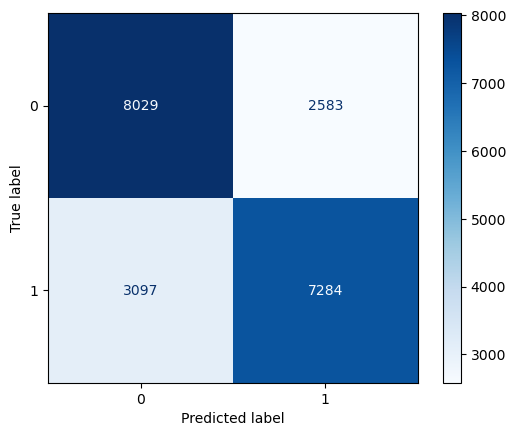

In [85]:
# see model results and add to results df
get_results(grid, 'K-Nearest Neighbours')

In [86]:
knn_model = grid

In [87]:
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [88]:
joblib.dump(ct, 'knn_scaler.pkl')

['knn_scaler.pkl']

### XGBoost

In [89]:
# train model
xgb.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = xgb.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.7329586052493688


In [90]:
from sklearn.model_selection import RandomizedSearchCV
# define parameter grid
param_grid = {
    'learning_rate': [0.08],
    'max_depth': [4],
    'min_child_weight': [2, 3],
    'n_estimators' : [125, 150],
    'scale_pos_weight' : [1.5, 1.7]
}

# create a RandomizedSearchCV object to search over the parameter grid
randomized_search = RandomizedSearchCV(xgb, param_grid, n_jobs = -1, scoring = 'accuracy', random_state =  42)

# fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train_scaled, y_train)

/Users/damiafatihah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_we

In [91]:
# print best parameter after tuning
print(randomized_search.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(randomized_search.best_estimator_)

{'scale_pos_weight': 1.5, 'n_estimators': 125, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.08}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.76      0.67      0.71     10612
           1       0.70      0.78      0.74     10381

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.72     20993
weighted avg       0.73      0.73      0.72     20993



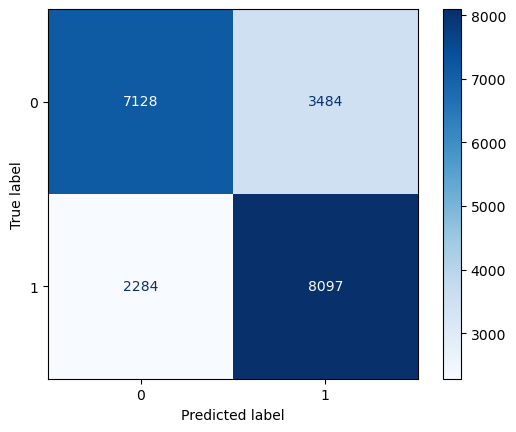

In [92]:
# see model results and add to results df
get_results(randomized_search, 'XGBoost')

In [93]:
xgb_model = randomized_search

In [94]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [95]:
joblib.dump(ct, 'xgb_scaler.pkl')

['xgb_scaler.pkl']

### Results

No handles with labels found to put in legend.


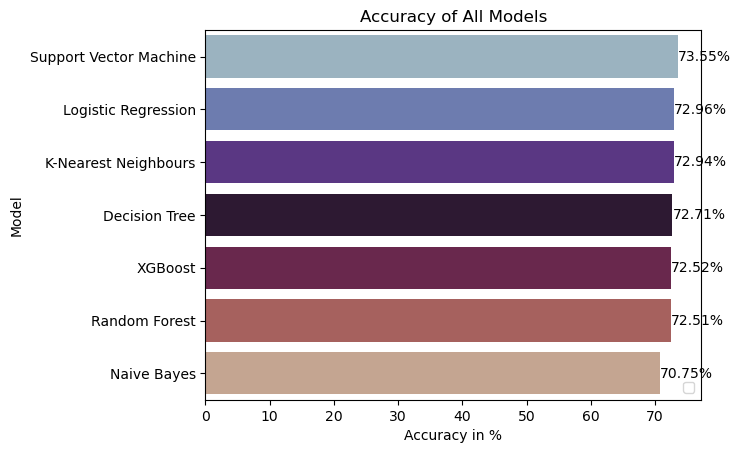

In [96]:
results = results.sort_values('Accuracy', ascending = False)
fig, ax = plt.subplots()
sns.barplot(x = results['Accuracy'], y = results.index, palette = 'twilight')

# add text labels to show the percentage of accuracy for each model
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])
    
plt.title('Accuracy of All Models')
plt.ylabel('Model')
plt.xlabel('Accuracy in %')
ax.legend(loc = 'lower right')

In [97]:
results

,Accuracy,Precision,Recall,F1-score
Support Vector Machine,73.55,0.76,0.69,0.72
Logistic Regression,72.96,0.75,0.68,0.71
K-Nearest Neighbours,72.94,0.74,0.70,0.72
Decision Tree,72.71,0.72,0.73,0.73
XGBoost,72.52,0.70,0.78,0.74
Random Forest,72.51,0.71,0.76,0.73
Naive Bayes,70.75,0.76,0.60,0.67


In [98]:
confusionMatrix

,True Positive,False Positive,True Negative,False Negative
Support Vector Machine,7111,2282,8330,3270
Logistic Regression,7066,2361,8251,3315
Random Forest,7885,3275,7337,2496
Decision Tree,7577,2925,7687,2804
Naive Bayes,6247,2007,8605,4134
K-Nearest Neighbours,7284,2583,8029,3097
XGBoost,8097,3484,7128,2284


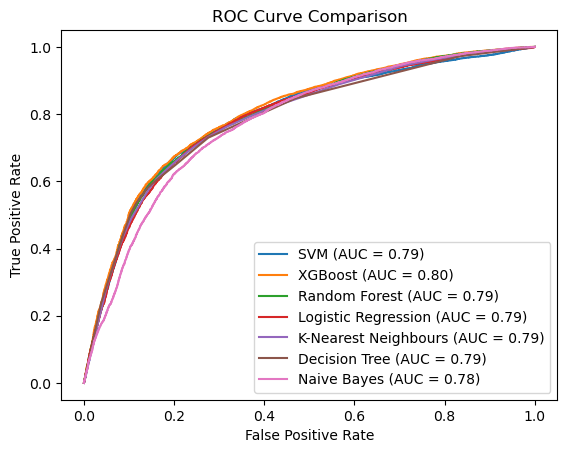

In [100]:
# ROC curve of all models
fig = plot_roc_curve(svm_model, X_test_scaled, y_test, name = 'SVM')
plot_roc_curve(xgb_model, X_test_scaled, y_test, ax = fig.ax_, name = 'XGBoost')
plot_roc_curve(rf_model, X_test_scaled, y_test, ax = fig.ax_, name = 'Random Forest')
plot_roc_curve(lr_model, X_test_scaled, y_test, ax = fig.ax_, name = 'Logistic Regression')
plot_roc_curve(knn_model, X_test_scaled, y_test, ax = fig.ax_, name = 'K-Nearest Neighbours')
plot_roc_curve(dt_model, X_test_scaled, y_test, ax = fig.ax_, name = 'Decision Tree')
plot_roc_curve(gnb_model, X_test_scaled, y_test, ax = fig.ax_, name = 'Naive Bayes')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()